In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# df = {'actuals' :[1,0,1,1,0,1,0,1,0,1], 
#       'predictions' :[1,0,1,1,1,1,1,1,1,0]}
# df = pd.DataFrame(df)

df = {'actuals' :[1,0,1,1,0,1,0,1,0,1], 
      'predictions' :[1,0,1,0,0,1,0,0,0,0],
      'probabilities' :[0.9,0.5,0.8,0.7,0.35,0.60,0.3,0.45,0.2,0.40]}
df = pd.DataFrame(df)
print(df.shape)

(10, 3)


In [2]:
df = {'actuals' :[1,0,1,1,0,1,0,1,0,1], 
      'predictions' :[1,0,1,1,0,1,0,0,0,0],
      'probabilities' :[0.9,0.2,0.8,0.7,0.4,0.85,0.3,0.6,0.1,0.55]}
df = pd.DataFrame(df)

In [3]:
df

,actuals,predictions,probabilities
0,1,1,0.90
1,0,0,0.20
2,1,1,0.80
3,1,1,0.70
4,0,0,0.40
5,1,1,0.85
6,0,0,0.30
7,1,0,0.60
8,0,0,0.10
9,1,0,0.55


In [4]:
cf_matrix = confusion_matrix(df['actuals'] , df['predictions'])
print(cf_matrix)

[[4 0]
 [2 4]]


In [5]:
TP = ((df['actuals'] == 1) & (df['predictions'] == 1)).sum()
TN = ((df['actuals'] == 0) & (df['predictions'] == 0)).sum()
FP = ((df['actuals'] == 0) & ( df['predictions'] == 1)).sum()
FN = ((df['actuals'] == 1) & ( df['predictions'] == 0)).sum()
print(f'TP: {TP}, FP: {FP}')
print(f'FN: {FN}, TN: {TN}')

TP: 4, FP: 0
FN: 2, TN: 4


In [6]:
sensitivity = TP/(TP+FN)
speficicity = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Sensitivity: {sensitivity}')
print(f'Speficicity: {speficicity}')


Sensitivity: 0.6666666666666666
Speficicity: 1.0


In [7]:
accuracy = (TP+TN) / (TP+TN+FP+FN)
precision = TP/(TP+FP)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')

Accuracy: 0.8
Precision: 1.0


In [8]:
prediction = {}
for i in range(1, 10):
    print(f'Cutoff: {i/10}')
    prediction[i] = []
    for j in range(len(df)):
        if df['probabilities'].iloc[j] < i/10:
            prediction[i].append(0)
        else:
            prediction[i].append(1)
prediction

Cutoff: 0.1
Cutoff: 0.2
Cutoff: 0.3
Cutoff: 0.4
Cutoff: 0.5
Cutoff: 0.6
Cutoff: 0.7
Cutoff: 0.8
Cutoff: 0.9


{1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 2: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 3: [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
 4: [1, 0, 1, 1, 1, 1, 0, 1, 0, 1],
 5: [1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
 6: [1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 7: [1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 8: [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 9: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

0    0.90
1    0.20
2    0.80
3    0.70
4    0.40
5    0.85
6    0.30
7    0.60
8    0.10
9    0.55
Name: probabilities, dtype: float64


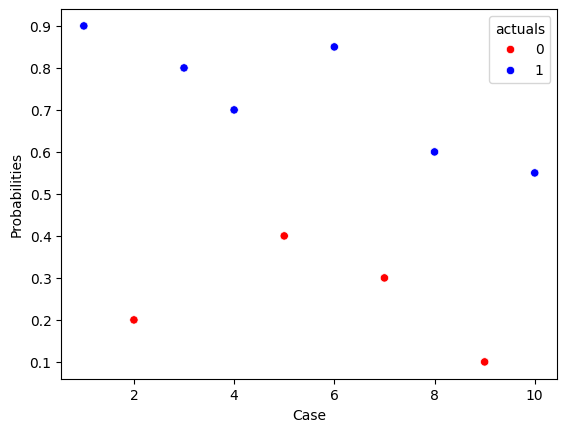

In [10]:
case = [1,2,3,4,5,6,7,8,9,10]
scatter = sns.scatterplot(x=case, y='probabilities', data=df, hue='actuals', palette=['red', 'blue'])
print(df['probabilities'])
xlabel = plt.xlabel('Case')
ylabel = plt.ylabel('Probabilities')

Bootstrap